In [1]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test)=cifar10.load_data()

print('Shape of x_train is {}'.format(x_train.shape))
print('Shape of x_test is {}'.format(x_test.shape)) 
print('Shape of y_train is {}'.format(y_train.shape))
print('Shape of y_test is {}'.format(y_test.shape))


170498071/170498071 [==============================] - 268s 2us/step
Shape of x_train is (50000, 32, 32, 3)
Shape of x_test is (10000, 32, 32, 3)
Shape of y_train is (50000, 1)
Shape of y_test is (10000, 1)


In [2]:
from tensorflow.keras.utils import to_categorical

# 将训练集和测试集的像素值归一化到 0 到 1 之间
x_train=x_train/255
x_test=x_test/255

# 类标签转换为 one-hot 编码格式，其中每个类别用一个长度为 10 的向量表示，对应类别的位置为 1，其他位置为 0
y_train_one_hot=to_categorical(y_train,10)
y_test_one_hot=to_categorical(y_test,10)

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout,Input, AveragePooling2D, Activation,Conv2D, MaxPooling2D, BatchNormalization,Concatenate
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Basic model

In [23]:
model1=Sequential()
model1.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(Flatten())
model1.add(Dense(256,activation='relu'))
model1.add(Dense(10,activation='softmax'))
model1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [24]:
print(model1)
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 800)               0         
                                                                 
 dense_6 (Dense)             (None, 256)              

In [25]:
# training_steps = train_generator.samples//train_generator.batch_size
# validation_steps=test_generator.samples//test_generator.batch_size
# history=model1.fit_generator(train_generator,epochs=50,steps_per_epoch=training_steps,validation_data=test_generator,validation_steps=validation_steps,callbacks=[board])
history1=model1.fit(x_train,y_train_one_hot,epochs=50,validation_data=(x_test,y_test_one_hot))

Epoch 1/50
1563/1563 [==============================] - 13s 7ms/step - loss: 1.4903 - accuracy: 0.4630 - val_loss: 1.2793 - val_accuracy: 0.5426
Epoch 2/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.1730 - accuracy: 0.5851 - val_loss: 1.1256 - val_accuracy: 0.6005
Epoch 3/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0208 - accuracy: 0.6420 - val_loss: 1.0569 - val_accuracy: 0.6299
Epoch 4/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9120 - accuracy: 0.6794 - val_loss: 0.9828 - val_accuracy: 0.6589
Epoch 5/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8231 - accuracy: 0.7115 - val_loss: 0.9991 - val_accuracy: 0.6588
Epoch 6/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7470 - accuracy: 0.7366 - val_loss: 1.0451 - val_accuracy: 0.6450
Epoch 7/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6787 - accuracy: 0.7636 - val_loss: 0.9644 - val_ac

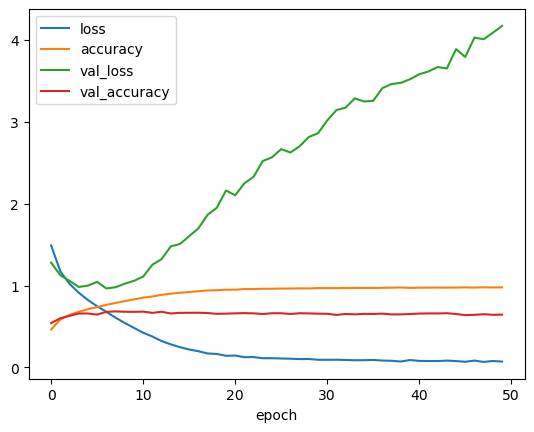

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

history_df = pd.DataFrame(history1.history)
history_df.plot()
plt.xlabel('epoch')
plt.show()

In [27]:
evaluation1 = model1.evaluate(x_test, y_test_one_hot)
print('Test Accuracy: {}'.format(evaluation1[1]))

313/313 [==============================] - 1s 3ms/step - loss: 4.1711 - accuracy: 0.6444
Test Accuracy: 0.6444000005722046


# Model 5: Adding Batch Normalization¶

In [28]:
model5 = Sequential()
model5.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model5.add(BatchNormalization())
model5.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model5.add(BatchNormalization())
model5.add(MaxPool2D((2, 2)))
model5.add(Dropout(0.2))
model5.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model5.add(BatchNormalization())
model5.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model5.add(BatchNormalization())
model5.add(MaxPool2D((2, 2)))
model5.add(Dropout(0.3))
model5.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model5.add(BatchNormalization())
model5.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model5.add(BatchNormalization())
model5.add(MaxPool2D((2, 2)))
model5.add(Dropout(0.4))
model5.add(Flatten())
model5.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model5.add(BatchNormalization())
model5.add(Dropout(0.5))
model5.add(Dense(10, activation='softmax'))
model5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [29]:
print(model5)
model5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_14 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_17 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_15 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                      

In [30]:
history5=model5.fit(x_train,y_train_one_hot,epochs=50,validation_data=(x_test,y_test_one_hot))

Epoch 1/50
1563/1563 [==============================] - 69s 37ms/step - loss: 1.6107 - accuracy: 0.4437 - val_loss: 1.0577 - val_accuracy: 0.6179
Epoch 2/50
1563/1563 [==============================] - 56s 36ms/step - loss: 1.0587 - accuracy: 0.6272 - val_loss: 0.9207 - val_accuracy: 0.6714
Epoch 3/50
1563/1563 [==============================] - 56s 36ms/step - loss: 0.9009 - accuracy: 0.6870 - val_loss: 0.8222 - val_accuracy: 0.7154
Epoch 4/50
1563/1563 [==============================] - 56s 36ms/step - loss: 0.7947 - accuracy: 0.7267 - val_loss: 0.7927 - val_accuracy: 0.7197
Epoch 5/50
1563/1563 [==============================] - 56s 36ms/step - loss: 0.7162 - accuracy: 0.7556 - val_loss: 0.6595 - val_accuracy: 0.7726
Epoch 6/50
1563/1563 [==============================] - 56s 36ms/step - loss: 0.6570 - accuracy: 0.7750 - val_loss: 0.5818 - val_accuracy: 0.8027
Epoch 7/50
1563/1563 [==============================] - 55s 35ms/step - loss: 0.6158 - accuracy: 0.7908 - val_loss: 0.5581 -

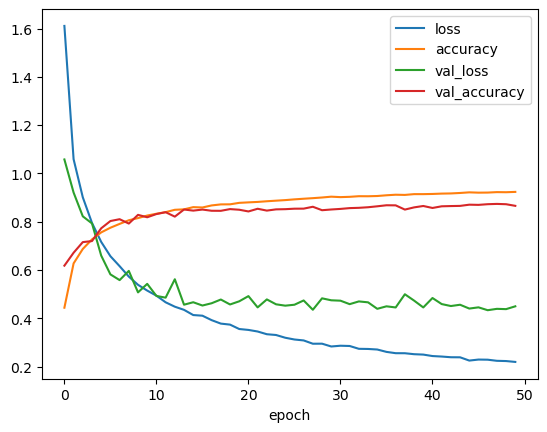

In [34]:
history_df = pd.DataFrame(history5.history)
history_df.plot()
plt.xlabel('epoch')
plt.show()

In [36]:
evaluation = model5.evaluate(x_test, y_test_one_hot)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 4s 11ms/step - loss: 0.4495 - accuracy: 0.8656
Test Accuracy: 0.8655999898910522
